This notebook shows spin density and vector kinetic energy density of neutron in 3D. 

In [1]:
import numpy as np
import scipy.interpolate
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

In [2]:
# read data and interpolate for plotting
def load_data(omega, isospin='pro', directory='', N=13, scale_factor=[2.0,1.4,2.0], Jstr='y'): 

    # read data
    df = pd.read_feather(directory+isospin+'_engel_sp_w'+omega+'.pd')
    x = df['x'].to_numpy(); y = df['y'].to_numpy(); z = df['z'].to_numpy()
    sx = df['s_x'].to_numpy(); sy = df['s_y'].to_numpy(); sz = df['s_z'].to_numpy()
    Tx = df['T_x'].to_numpy(); Ty = df['T_y'].to_numpy(); Tz = df['T_z'].to_numpy()
    Jx = df['J_x'+Jstr].to_numpy(); Jy = df['J_y'+Jstr].to_numpy(); Jz = df['J_z'+Jstr].to_numpy()
    
    # interpolate s
    xi = np.linspace(x.min(), x.max(), N)
    yi = np.linspace(y.min(), y.max(), N)
    zi = np.linspace(z.min(), z.max(), N)
    xmesh, ymesh, zmesh = np.meshgrid(xi, yi, zi)
    xmesh = xmesh.flatten(); ymesh = ymesh.flatten(); zmesh = zmesh.flatten()
    xu = np.unique(x); yu = np.unique(y); zu = np.unique(z)
    sxu = np.flip(sx).reshape((len(zu),len(yu),len(xu))).transpose()
    syu = np.flip(sy).reshape((len(zu),len(yu),len(xu))).transpose()
    szu = np.flip(sz).reshape((len(zu),len(yu),len(xu))).transpose()
    interpx = scipy.interpolate.RegularGridInterpolator((xu,yu,zu),sxu,method='linear')
    interpy = scipy.interpolate.RegularGridInterpolator((xu,yu,zu),syu,method='linear')
    interpz = scipy.interpolate.RegularGridInterpolator((xu,yu,zu),szu,method='linear')
    sxi = interpx(np.concatenate([xmesh[:,None],ymesh[:,None],zmesh[:,None]],axis=1))
    syi = interpy(np.concatenate([xmesh[:,None],ymesh[:,None],zmesh[:,None]],axis=1))
    szi = interpz(np.concatenate([xmesh[:,None],ymesh[:,None],zmesh[:,None]],axis=1))
    maxlength = np.sqrt(sxi**2+syi**2+szi**2).max()
    if omega!='0.0': 
        sxi = scale_factor[0]*sxi/maxlength; syi = scale_factor[0]*syi/maxlength; szi = scale_factor[0]*szi/maxlength
    
    # interpolate T
    Txu = np.flip(Tx).reshape((len(zu),len(yu),len(xu))).transpose()
    Tyu = np.flip(Ty).reshape((len(zu),len(yu),len(xu))).transpose()
    Tzu = np.flip(Tz).reshape((len(zu),len(yu),len(xu))).transpose()
    interpx = scipy.interpolate.RegularGridInterpolator((xu,yu,zu),Txu,method='linear')
    interpy = scipy.interpolate.RegularGridInterpolator((xu,yu,zu),Tyu,method='linear')
    interpz = scipy.interpolate.RegularGridInterpolator((xu,yu,zu),Tzu,method='linear')
    Txi = interpx(np.concatenate([xmesh[:,None],ymesh[:,None],zmesh[:,None]],axis=1))
    Tyi = interpy(np.concatenate([xmesh[:,None],ymesh[:,None],zmesh[:,None]],axis=1))
    Tzi = interpz(np.concatenate([xmesh[:,None],ymesh[:,None],zmesh[:,None]],axis=1))
    maxlength = np.sqrt(Txi**2+Tyi**2+Tzi**2).max()
    if omega!='0.0':  
        Txi = scale_factor[1]*Txi/maxlength; Tyi = scale_factor[1]*Tyi/maxlength; Tzi = scale_factor[1]*Tzi/maxlength
    
    # interpolate J
    Jxu = np.flip(Jx).reshape((len(zu),len(yu),len(xu))).transpose()
    Jyu = np.flip(Jy).reshape((len(zu),len(yu),len(xu))).transpose()
    Jzu = np.flip(Jz).reshape((len(zu),len(yu),len(xu))).transpose()
    interpx = scipy.interpolate.RegularGridInterpolator((xu,yu,zu),Jxu,method='linear')
    interpy = scipy.interpolate.RegularGridInterpolator((xu,yu,zu),Jyu,method='linear')
    interpz = scipy.interpolate.RegularGridInterpolator((xu,yu,zu),Jzu,method='linear')
    Jxi = interpx(np.concatenate([xmesh[:,None],ymesh[:,None],zmesh[:,None]],axis=1))
    Jyi = interpy(np.concatenate([xmesh[:,None],ymesh[:,None],zmesh[:,None]],axis=1))
    Jzi = interpz(np.concatenate([xmesh[:,None],ymesh[:,None],zmesh[:,None]],axis=1))
    maxlength = np.sqrt(Jxi**2+Jyi**2+Jzi**2).max()
    Jxi = scale_factor[2]*Jxi/maxlength; Jyi = scale_factor[2]*Jyi/maxlength; Jzi = scale_factor[2]*Jzi/maxlength
    
    return xmesh,ymesh,zmesh,sxi,syi,szi,Txi,Tyi,Tzi,Jxi,Jyi,Jzi

In [3]:
# plot 3d figure
def plot_3d(omega,xmesh,ymesh,zmesh,sxi,syi,szi,title,elev=25,azim=45): 
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(elev=elev,azim=azim)
    ax.quiver(xmesh, ymesh, zmesh, sxi, syi, szi, pivot='middle', arrow_length_ratio=.5)
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
    ax.set_title(title)

In [4]:
%matplotlib notebook
omega='0.5'
Jstr='y'
xmesh,ymesh,zmesh,sxi,syi,szi,Txi,Tyi,Tzi,Jxi,Jyi,Jzi=load_data(omega, N=13, Jstr=Jstr)

<IPython.core.display.Javascript object>


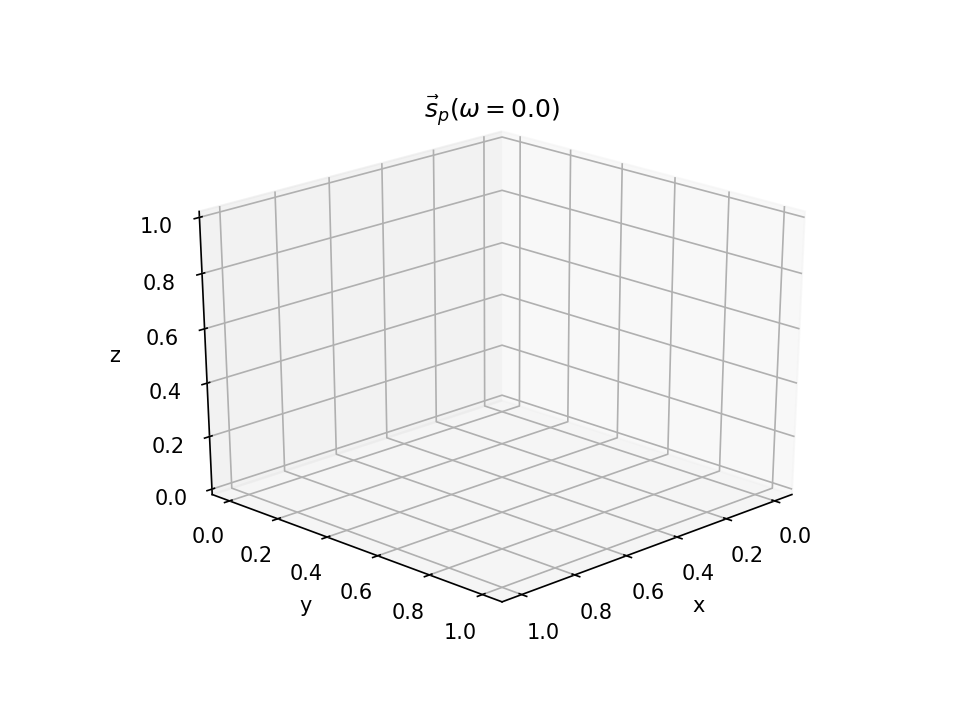

In [5]:
plot_3d(omega,xmesh,ymesh,zmesh,sxi,syi,szi,r'$\vec{s}_p(\omega='+omega+r')$')

<IPython.core.display.Javascript object>


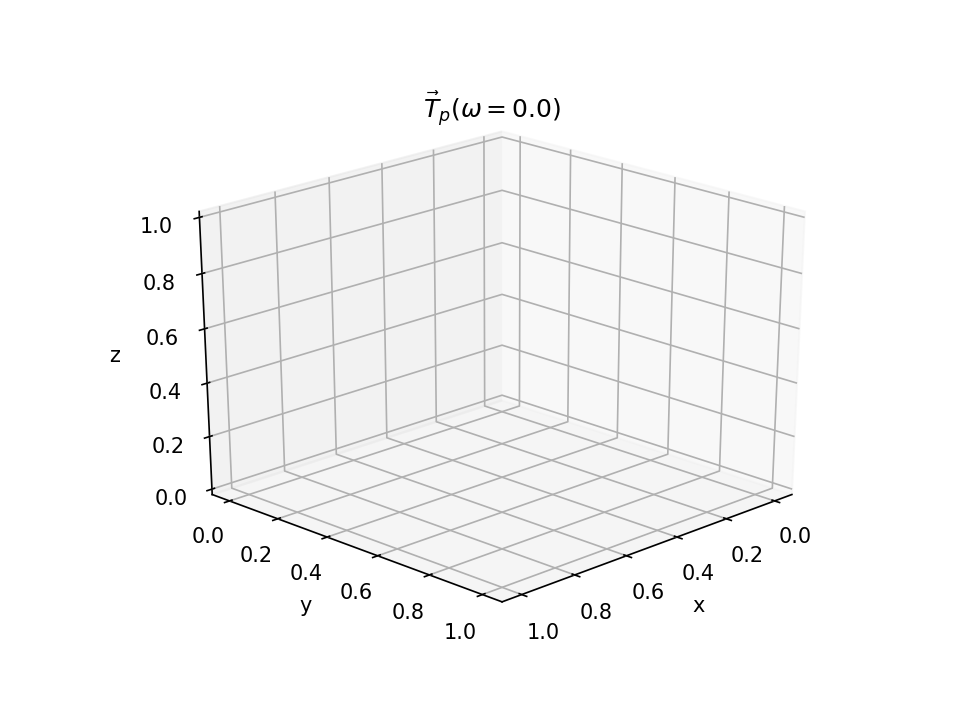

In [6]:
plot_3d(omega,xmesh,ymesh,zmesh,Txi,Tyi,Tzi,r'$\vec{T}_p(\omega='+omega+r')$')

<IPython.core.display.Javascript object>


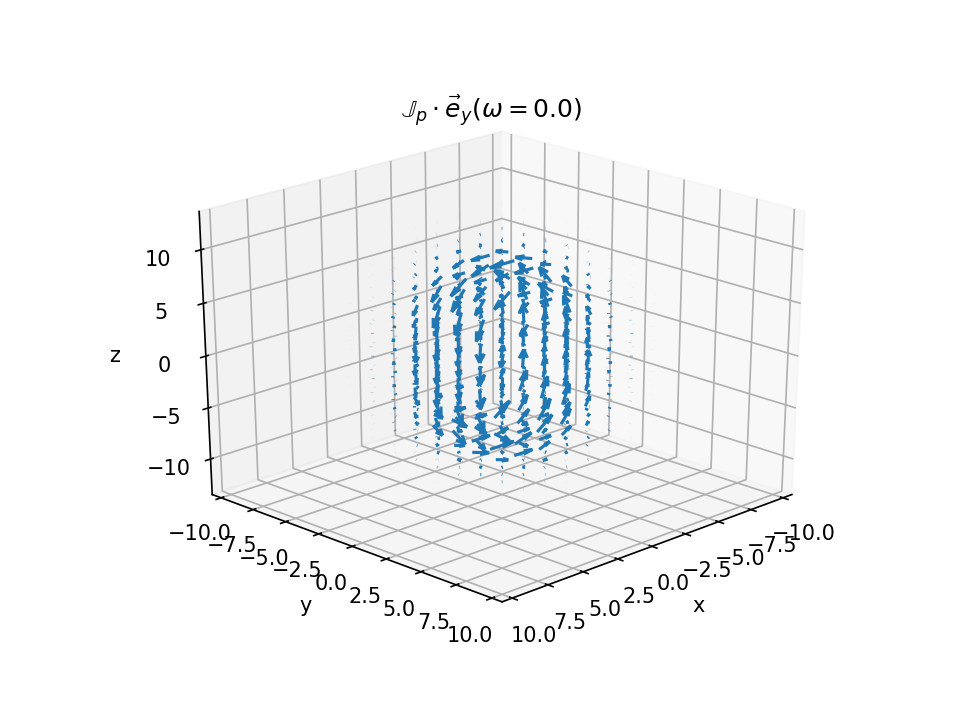

In [7]:
plot_3d(omega,xmesh,ymesh,zmesh,Jxi,Jyi,Jzi,r'$\mathbb{J}_p\cdot\vec{e}_'+Jstr+r'(\omega='+omega+r')$')